## We ran the wind experiments for an addition year to address Reviewer #2's concern about the model not having time to reach equilibrium. Results for both years are presented in the figures below

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import bio_tools as bt, places
import xarray as xr
import os
import glob
%matplotlib inline

In [2]:
CY_SST_Orig=[ 6.12548543,  5.80986749,  7.48572357,  9.13112748, 12.73411507,
       16.15264921, 18.19417126, 18.16483525, 15.4019242 , 12.00080142,
        9.30544262,  6.33640542]

In [3]:
CY_SST_Winds_Y1=[ 5.59662968,  5.90259706,  7.60633249,  9.04497093, 13.09915475,
       16.51518926, 20.73906041, 19.60519318, 16.00876067, 11.95839157,
        9.37915939,  6.13304258]

In [4]:
CY_SST_Winds_Y2=[5.3144736 ,  5.82461143,  7.533022  ,  8.99893274, 13.064227  ,
       16.45643869, 20.76592199, 19.59092608, 16.02154355, 11.93064431,
        9.31469274,  6.45635569]

#### Surface PAR Summary

In [5]:
CY_PAR_Orig=[ 14.23656201,  25.43115062,  41.18548663,  59.62425692,
        84.90996976,  94.11623964, 100.57448297,  80.0413251 ,
        60.47416396,  29.24353915,  13.14300199,  10.14804782]

In [6]:
CY_PAR_Winds_Y1=[ 14.22929443,  25.46042814,  40.97263571,  59.96603881,
        84.80457427,  94.07934195, 101.42659579,  80.66420632,
        60.70089652,  29.308822  ,  13.13657237,  10.14639563]

In [7]:
CY_PAR_Winds_Y2=[14.23036176,  25.45892892,  40.96991556,  59.99888134,
        84.75116249,  94.02228095, 101.41880301,  80.63876782,
        60.71912184,  29.30575302,  13.13551899,  10.64244049]

#### Halocline Summary

In [8]:
CY_Halo_Orig=[0.24051982, 0.67116015, 0.49243159, 0.66998316, 1.90583354,
       2.39576078, 1.47431471, 1.41058524, 1.23433735, 0.80587692,
       0.68233926, 0.53663027]

In [9]:
CY_Halo_Winds_Y1=[0.43660533, 0.37044598, 0.83569275, 0.73468569, 2.00271344,
       2.85756909, 3.35009795, 1.92678914, 1.44402677, 0.50235841,
       1.0366904 , 0.76952968]

In [10]:
CY_Halo_Winds_Y2=[0.47133019, 0.34663365, 0.86317614, 0.74553958, 2.16368393,
       3.06024837, 3.38882633, 2.08639982, 1.46268195, 0.50796438,
       1.20662328, 0.76432865]

### Nitrate Summary

In [11]:
CY_Orig_N=[24.75940603, 23.24451257, 21.67931533,  9.49131555,  6.21805258,
        2.60290254,  2.49482242,  5.34246862, 11.184194  , 15.54722773,
       21.87987576, 23.24806845]

In [12]:
CY_Winds_N_Y1=[24.13891096, 23.43445999, 20.16081944,  9.53873272,  5.7397893 ,
        2.06754755,  0.95348431,  2.25127683,  8.106326  , 16.05059715,
       20.61628598, 23.32419151]

In [13]:
CY_Winds_N_Y2=[24.19100149, 23.95120147, 20.3755859 ,  9.76894938,  5.78124702,
        2.13106439,  0.85153579,  2.49034809,  8.16672292, 16.29130695,
       20.77454632, 23.70879044]

#### Silicon Summary

In [14]:
CY_Orig_Si=[50.11491397, 51.4414015 , 50.00709959, 24.5001276 ,  9.95727285,
        8.81748288,  7.44068909,  9.67266691, 22.68525289, 29.63323648,
       41.74223596, 46.96035035]

In [15]:
CY_Winds_Si_Y1=[50.06105751, 51.39125156, 49.65665279, 23.79865366,  8.11240424,
       10.9729251 , 13.07850414, 11.59949357, 21.74708727, 35.04296807,
       42.83359454, 47.61766334]

In [16]:
CY_Winds_Si_Y2=[50.02450796, 52.15863613, 50.42121988, 24.50634265,  8.30358965,
       10.95476219, 13.43133917, 12.12435157, 21.59295336, 34.81984836,
       42.77449073, 47.26684335]

#### Diatom Summary

In [17]:
CY_Diat_Orig=[ 0.23982064,  0.17371493,  3.13439335, 38.20802266, 35.26040455,
       20.78222047, 19.78868161, 10.83708083,  9.15037476,  1.56574763,
        0.69712752,  0.49628067]

In [18]:
CY_Diat_Winds_Y1=[ 0.23412573,  0.1572702 ,  4.01715842, 35.63039506, 38.12295916,
       16.12961134, 13.7174575 ,  7.94355529,  4.27612511,  0.95877994,
        0.58034538,  0.41772271]

In [19]:
CY_Diat_Winds_Y2=[0.26709067,  0.1586944 ,  4.0578234 , 34.79861717, 39.07278434,
       16.84804742, 12.48696873,  8.62398103,  4.50365869,  1.05384867,
        0.62427003,  0.45662006]

Text(-0.5, 41, '(f)')

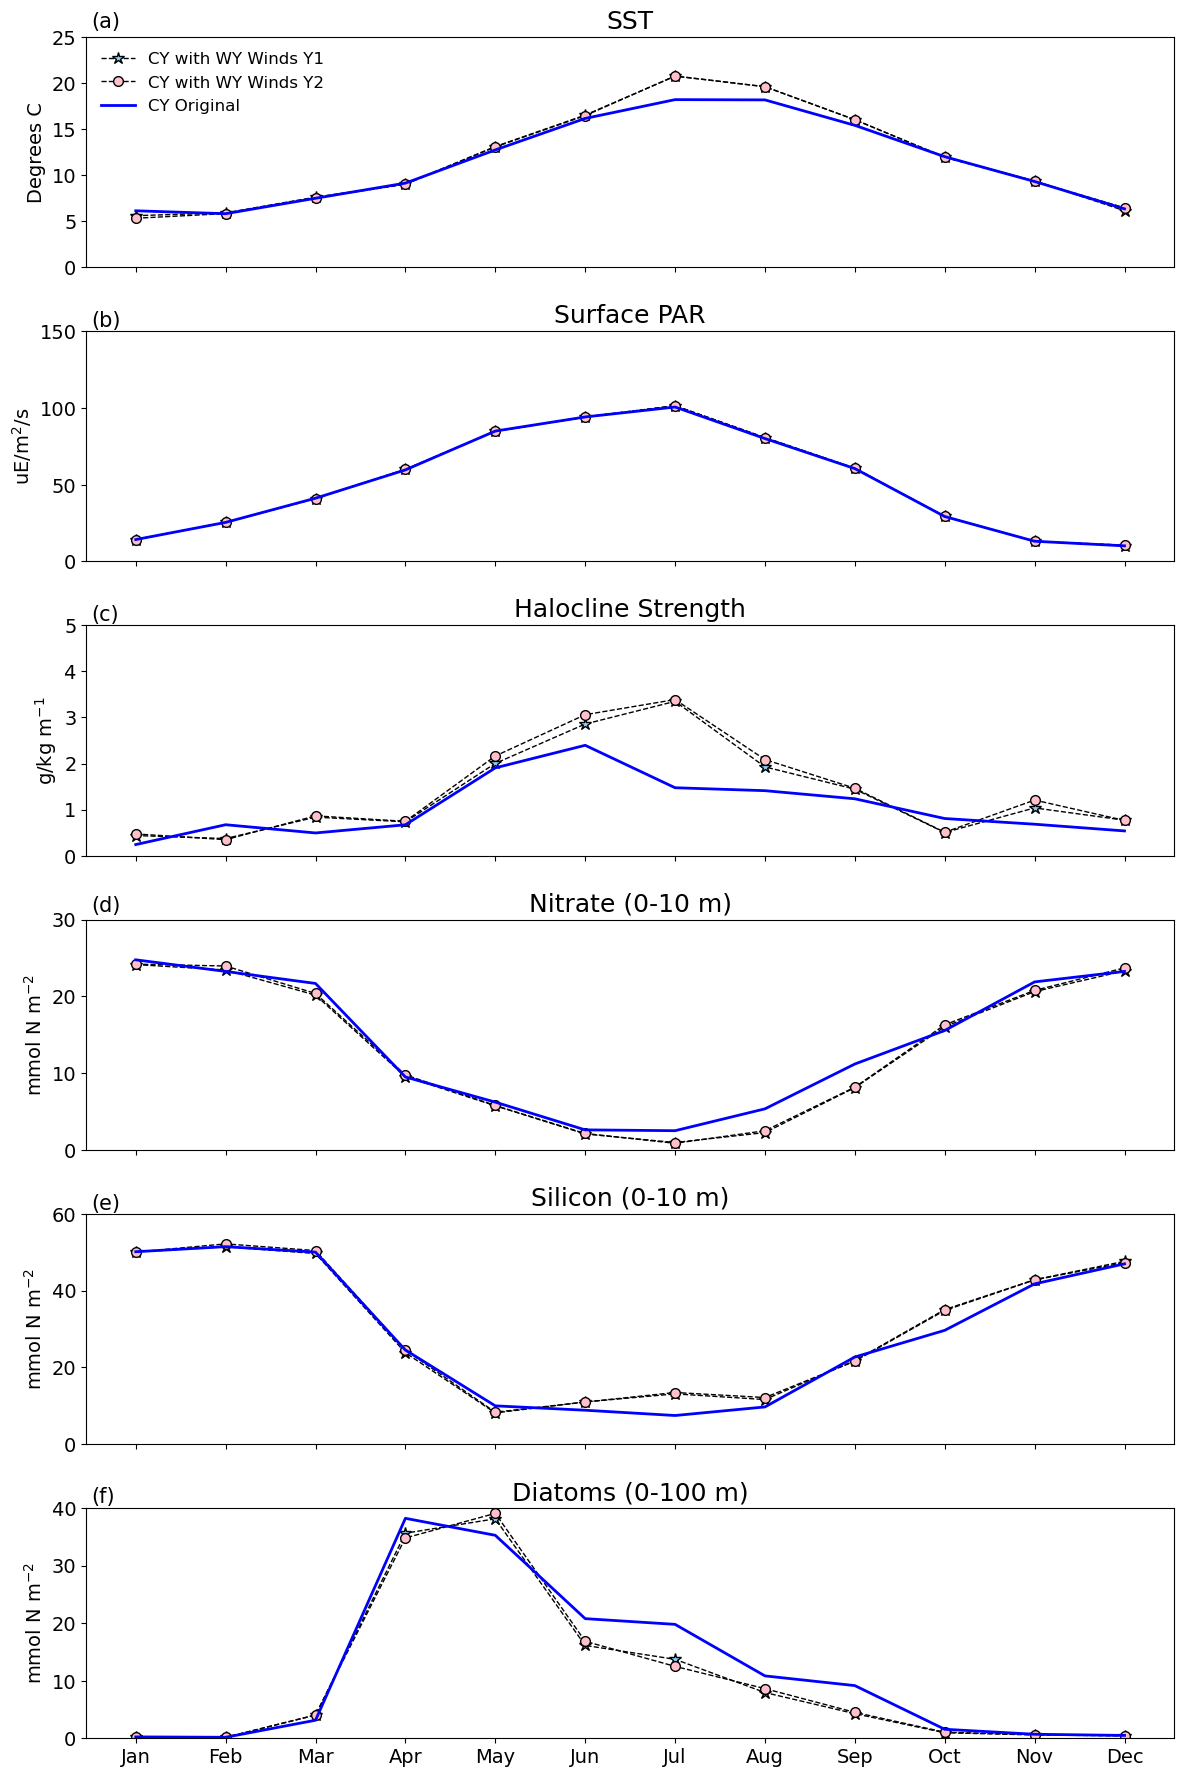

In [23]:
fig,ax=plt.subplots(6,1,figsize=(12,18))

fig.tight_layout(pad=2.5)

months=np.arange(1,13)
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]



ax[0].plot(xticks,CY_SST_Winds_Y1,'--',marker='*',markersize=9,linewidth=1,markerfacecolor='lightskyblue',color='k',label='CY with WY Winds Y1')
ax[0].plot(xticks,CY_SST_Winds_Y2,'--',marker='o',markersize=7,linewidth=1,markerfacecolor='pink',color='k',label='CY with WY Winds Y2')
ax[0].plot(xticks,CY_SST_Orig,'-',color='b',markersize=7,linewidth=2,label='CY Original')

ax[0].legend(frameon=False,loc=2,fontsize=12)
ax[0].set_ylabel('Degrees C',fontsize=14)
ax[0].set_xlabel('')
ax[0].set_ylim(0,25)
ax[0].set_title('SST',fontsize=18)
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].yaxis.set_tick_params(labelsize=14)
ax[0].set_xticklabels([])
ax[0].text(-.5, 26, '(a)', fontsize=15,  color='k')


ax[1].plot(xticks,CY_PAR_Winds_Y1,'--',marker='*',markersize=9,linewidth=1,markerfacecolor='lightskyblue',color='k',label='CY with WY Winds Y1')
ax[1].plot(xticks,CY_PAR_Winds_Y2,'--',marker='o',markersize=7,linewidth=1,markerfacecolor='pink',color='k',label='CY with WY Winds Y2')
ax[1].plot(xticks,CY_PAR_Orig,'-',color='b',markersize=7,linewidth=2,label='CY Original')

ax[1].legend((),frameon=False)
ax[1].set_ylabel('uE/m$^{2}$/s',fontsize=14)
ax[1].set_xlabel('')
ax[1].set_ylim(0,150)
ax[1].set_title('Surface PAR',fontsize=18)
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].yaxis.set_tick_params(labelsize=14)
ax[1].set_xticklabels([])
ax[1].text(-.5, 153, '(b)', fontsize=15,  color='k')


ax[2].plot(xticks,CY_Halo_Winds_Y1,'--',marker='*',markersize=9,linewidth=1,markerfacecolor='lightskyblue',color='k',label='CY with WY Winds Y1')
ax[2].plot(xticks,CY_Halo_Winds_Y2,'--',marker='o',markersize=7,linewidth=1,markerfacecolor='pink',color='k',label='CY with WY Winds Y2')
ax[2].plot(xticks,CY_Halo_Orig,'-',color='b',markersize=7,linewidth=2,label='CY Original')

ax[2].legend((),frameon=False)
ax[2].set_ylabel('g/kg m$^{-1}$',fontsize=14)
ax[2].set_xlabel('')
ax[2].set_ylim(0,5)
ax[2].set_title('Halocline Strength',fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=14)
ax[2].yaxis.set_tick_params(labelsize=14)
ax[2].set_xticklabels([])
ax[2].text(-.5, 5.1, '(c)', fontsize=15,  color='k')


ax[3].plot(xticks,CY_Winds_N_Y1,'--',marker='*',markersize=9,linewidth=1,markerfacecolor='lightskyblue',color='k',label='CY with WY Winds Y1')
ax[3].plot(xticks,CY_Winds_N_Y2,'--',marker='o',markersize=7,linewidth=1,markerfacecolor='pink',color='k',label='CY with WY Winds Y2')
ax[3].plot(xticks,CY_Orig_N,'-',color='b',markersize=7,linewidth=2,label='CY Original')

ax[3].legend((),frameon=False)
ax[3].set_ylabel('mmol N m$^{-2}$',fontsize=14)
ax[3].set_xlabel('')
ax[3].set_ylim(0,30)
ax[3].set_title('Nitrate (0-10 m)',fontsize=18)
ax[3].xaxis.set_tick_params(labelsize=14)
ax[3].yaxis.set_tick_params(labelsize=14)
ax[3].set_xticklabels([])
ax[3].text(-.5, 31, '(d)', fontsize=15,  color='k')


ax[4].plot(xticks,CY_Winds_Si_Y1,'--',marker='*',markersize=9,linewidth=1,markerfacecolor='lightskyblue',color='k',label='CY with WY Winds Y1')
ax[4].plot(xticks,CY_Winds_Si_Y2,'--',marker='o',markersize=7,linewidth=1,markerfacecolor='pink',color='k',label='CY with WY Winds Y2')
ax[4].plot(xticks,CY_Orig_Si,'-',color='b',markersize=7,linewidth=2,label='CY Original')

ax[4].legend((),frameon=False)
ax[4].set_ylabel('mmol N m$^{-2}$',fontsize=14)
ax[4].set_xlabel('')
ax[4].set_ylim(0,60)
ax[4].set_title('Silicon (0-10 m)',fontsize=18)
ax[4].xaxis.set_tick_params(labelsize=14)
ax[4].yaxis.set_tick_params(labelsize=14)
ax[4].set_xticklabels([])
ax[4].text(-.5, 61, '(e)', fontsize=15,  color='k')


ax[5].plot(xticks,CY_Diat_Winds_Y1,'--',marker='*',markersize=9,linewidth=1,markerfacecolor='lightskyblue',color='k',label='CY with WY Winds Y1')
ax[5].plot(xticks,CY_Diat_Winds_Y2,'--',marker='o',markersize=7,linewidth=1,markerfacecolor='pink',color='k',label='CY with WY Winds Y2')
ax[5].plot(xticks,CY_Diat_Orig,'-',color='b',markersize=7,linewidth=2,label='CY Original')

ax[5].legend((),frameon=False)
ax[5].set_ylabel('mmol N m$^{-2}$',fontsize=14)
ax[5].set_xlabel('')
ax[5].set_ylim(0,40)
ax[5].set_title('Diatoms (0-100 m)',fontsize=18)
ax[5].xaxis.set_tick_params(labelsize=14)
ax[5].yaxis.set_tick_params(labelsize=14)
ax[5].text(-.5, 41, '(f)', fontsize=15,  color='k')

#ax[5].set_xticklabels([])

#fig.suptitle('Warm Year Experiments')

#plt.savefig('Figure8_CYExperiments_Revised.png', bbox_inches='tight',dpi=1000,transparent=False)